# 1. Data Exploration

**Load and Display the Data**

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [97]:
data = pd.read_csv('/content/hotel.csv')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [99]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340


# 2. Data Cleaning and Preprocessing

In [100]:
data['children'] = data['children'].fillna(0)
data = data.dropna()

In [101]:
data = data.copy()
most_frequent_country = data['country'].mode()[0]
data['country'] = data['country'].fillna(most_frequent_country)
data['agent'] = data['agent'].fillna('Unknown')
data['company'] = data['company'].fillna('Unknown')

In [102]:
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 28


In [103]:
data = data.drop_duplicates()

In [104]:
data['children'] = data['children'].astype(int)
data['is_canceled'] = data['is_canceled'].astype(int)

<ipython-input-104-9f45725231ca>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-104-9f45725231ca>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Encode Categorical Variables**

In [105]:
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                       'deposit_type', 'customer_type', 'agent', 'company']

In [106]:
data_copy = data.copy()
for col in categorical_columns:
    le = LabelEncoder()
    data_copy.loc[:, col] = le.fit_transform(data_copy[col].astype(str))

In [107]:
columns_to_drop = ['reservation_status', 'reservation_status_date']
data_copy = data_copy.drop(columns=columns_to_drop)

In [108]:
data_copy['total_nights'] = data_copy['stays_in_weekend_nights'] + data_copy['stays_in_week_nights']
data_copy['total_guests'] = data_copy['adults'] + data_copy['children'] + data_copy['babies']

In [109]:
# Check for outliers
numerical_columns = data_copy.select_dtypes(include=['int64', 'float64'])

print("\nChecking for outliers:")
for col in numerical_columns:
    Q1 = data_copy[col].quantile(0.25)
    Q3 = data_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data_copy[col] < lower_bound) | (data_copy[col] > upper_bound)).sum()
    print(f"- Outliers in {col}: {outliers}")



Checking for outliers:
- Outliers in is_canceled: 16
- Outliers in lead_time: 12
- Outliers in arrival_date_year: 0
- Outliers in arrival_date_week_number: 17
- Outliers in arrival_date_day_of_month: 24
- Outliers in stays_in_weekend_nights: 4
- Outliers in stays_in_week_nights: 4
- Outliers in adults: 0
- Outliers in children: 6
- Outliers in babies: 0
- Outliers in is_repeated_guest: 15
- Outliers in previous_cancellations: 1
- Outliers in previous_bookings_not_canceled: 14
- Outliers in booking_changes: 1
- Outliers in agent: 0
- Outliers in company: 32
- Outliers in days_in_waiting_list: 0
- Outliers in adr: 8
- Outliers in required_car_parking_spaces: 19
- Outliers in total_of_special_requests: 29
- Outliers in total_nights: 4
- Outliers in total_guests: 2


In [110]:
data['is_canceled'].value_counts()

,count
is_canceled,
0,173
1,16


# 3. Data Preparation

In [114]:
X = data_copy.drop('is_canceled', axis=1)
y = data_copy['is_canceled']

In [115]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [117]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (151, 31)
X_test shape: (38, 31)
y_train shape: (151,)
y_test shape: (38,)


# 4. Model Building and Training

In [118]:
import tensorflow as tf
import keras

In [119]:
KerasModel = keras.models.Sequential([
            keras.layers.Dense(8,  activation = 'relu'),
            keras.layers.Dense(128, activation = 'relu'),
            keras.layers.Dense(64, activation = 'relu'),
            keras.layers.Dense(32, activation = 'relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(1, activation = 'sigmoid')
            ])

In [121]:
KerasModel.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [127]:
history = KerasModel.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=1,
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                        patience=40,
                        monitor='val_accuracy',
                        restore_best_weights=True)])

Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9566 - loss: 0.1077 - val_accuracy: 0.9211 - val_loss: 0.4993
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9483 - loss: 0.1185 - val_accuracy: 0.9211 - val_loss: 0.4467
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9457 - loss: 0.1265 - val_accuracy: 0.8947 - val_loss: 0.4610
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.0926 - val_accuracy: 0.9211 - val_loss: 0.5838
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9554 - loss: 0.0767 - val_accuracy: 0.8947 - val_loss: 0.6101
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0460 - val_accuracy: 0.8947 - val_loss: 0.5965
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0520 - val_accuracy: 0.8947 - val_loss: 0.6351
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9546 - loss: 0.0759 - val_acc

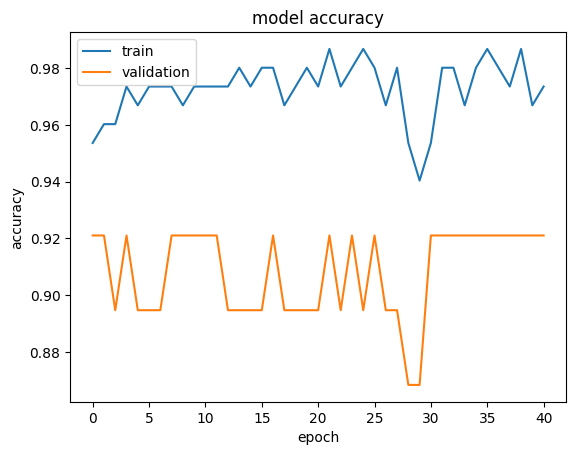

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()